In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math
import os
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

# set random see for reproducibility
RANDOM_SEED = 10


np.random.seed(RANDOM_SEED)
tf.set_random_seed(RANDOM_SEED)

In [22]:
# Read data
power=pd.read_csv('data/THPOE_POWER export 2019-08-14.csv')
power=pd.DataFrame(power)
power['TS']=pd.to_datetime(power['TS'])

power_Passivhaus=power[power['HOUSE']=='Passivhaus'].sort_index(by='TS') # Divide data into two groups
power_Standard=power[power['HOUSE']=='StandardHouse'].sort_index(by='TS')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [87]:
power_Passivhaus.describe()

,POWER
count,"283,367.0000"
mean,0.7056
std,0.9859
min,0.0000
25%,0.0000
50%,0.6000
75%,0.8000
max,65.0000


# Plots

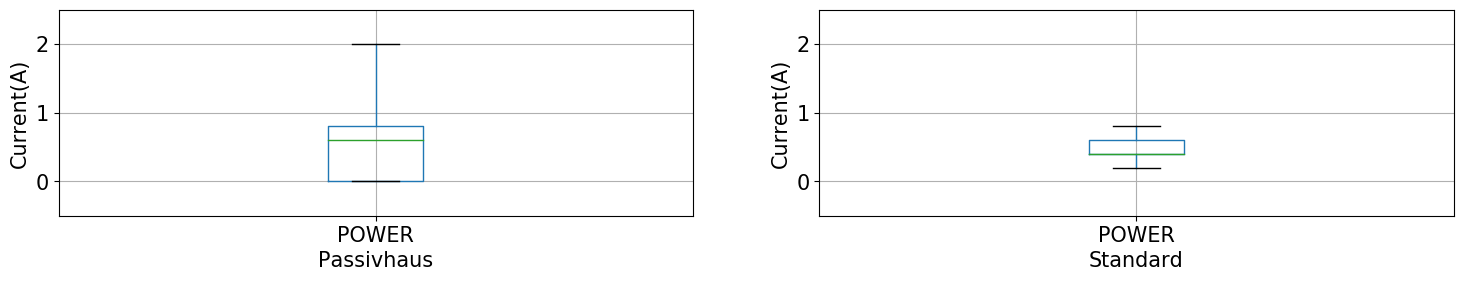

In [24]:
# Box plot
fig = plt.figure(figsize=(18, 6), dpi=100)
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)

plt.sca(ax1)
power_Passivhaus.boxplot(fontsize=15,showfliers=False)
plt.ylabel('Current(A)',fontsize=15)
plt.xlabel('Passivhaus',fontsize=15)
ax1.set_ylim(-0.5, 2.5)

plt.sca(ax2)
power_Standard.boxplot(fontsize=15,showfliers=False)
plt.ylabel('Current(A)',fontsize=15)
plt.xlabel('Standard',fontsize=15)
ax2.set_ylim(-0.5,2.5)
plt.savefig('boxplot.jpg',bbox_inches = 'tight')

In [25]:
power_Passivhaus=power_Passivhaus[power_Passivhaus['POWER']<50] # Drop short circuit data

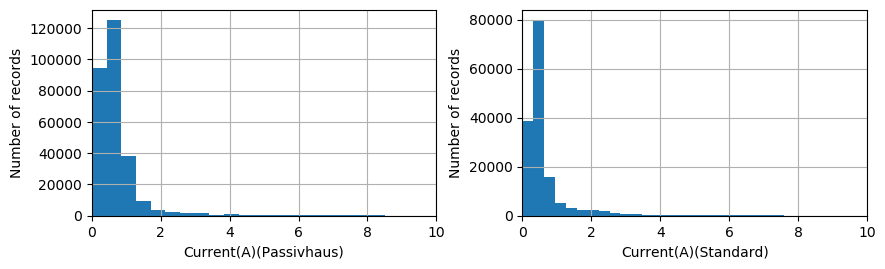

In [45]:
# Distribution of dataset
fig = plt.figure(figsize=(10, 6), dpi=100)
ax1=fig.add_subplot(2,2,1)

ax1.hist(power_Passivhaus['POWER'],bins=50)
plt.ylabel('Number of records',fontsize=10)
plt.xlabel('Current(A)(Passivhaus)',fontsize=10)
plt.xlim(0,10)
fig.subplots_adjust(wspace = 0.25)

plt.grid()

ax2=fig.add_subplot(2,2,2)
ax2.hist(power_Standard['POWER'],bins=50)
plt.ylabel('Number of records',fontsize=10)
plt.xlabel('Current(A)(Standard)',fontsize=10)
plt.xlim(0,10)
plt.grid()

plt.savefig('histplot.jpg',bbox_inches = 'tight')

In [58]:
# Data processing
# Uniform data
power_PassivhausH=power_Passivhaus.copy()
power_PassivhausH['TS']=[datetime.strftime(x,'%Y-%m-%d %H:%M') for x in power_PassivhausH['TS']]
power_PassivhauH=power_PassivhausH.pivot_table(index='TS',aggfunc='mean')
power_PassivhausH=power_PassivhausH.set_index('TS')

power_StandardH=power_Standard.copy()
power_StandardH['TS']=[datetime.strftime(x,'%Y-%m-%d %H:%M') for x in power_StandardH['TS']]
power_StandardH=power_StandardH.pivot_table(index='TS',aggfunc='mean')

In [59]:
power_PassivhausH.index=[datetime.strftime(x,'%H') for x in pd.to_datetime(power_PassivhausH.index)]
power_PassivhauH=power_PassivhausH.pivot_table(index=power_PassivhausH.index,aggfunc='mean')

power_StandardH.index=[datetime.strftime(x,'%H') for x in pd.to_datetime(power_StandardH.index)]
power_StandardH=power_StandardH.pivot_table(index=power_StandardH.index,aggfunc='mean')

In [56]:
power_PassivhauH.index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
power_StandardH.index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

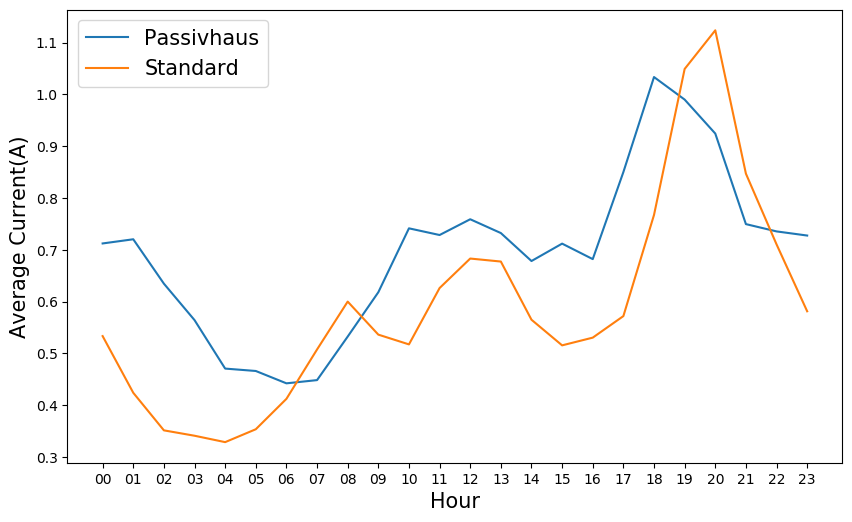

In [60]:
# Weekly and daily profile
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(power_PassivhauH,label='Passivhaus')
plt.plot(power_StandardH,label='Standard')
plt.ylabel('Average Current(A)',fontsize=15)
plt.xlabel('Hour',fontsize=15)
plt.legend(fontsize=15)

plt.savefig('hourprofile.jpg',bbox_inches = 'tight')

# NA data

In [61]:
# Read data
power=pd.read_csv('data/THPOE_POWER export 2019-08-14.csv')
power=pd.DataFrame(power)
power['TS']=pd.to_datetime(power['TS'])

power_Passivhaus=power[power['HOUSE']=='Passivhaus'].sort_index(by='TS')
power_Standard=power[power['HOUSE']=='StandardHouse'].sort_index(by='TS')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [62]:
# Find the missing values
power_Passivhaus['TS'] = [datetime.strftime(x,'%Y-%m-%d %H:%M') for x in power_Passivhaus['TS']]
power_Passivhaus=power_Passivhaus.pivot_table(index='TS',aggfunc='mean')
power_Passivhaus.index=pd.to_datetime(power_Passivhaus.index)
power_Passivhaus=power_Passivhaus.resample('1H').mean()
power_Standard['TS'] = [datetime.strftime(x,'%Y-%m-%d %H:%M') for x in power_Standard['TS']]
power_Standard=power_Standard.pivot_table(index='TS',aggfunc='mean')
power_Standard.index=pd.to_datetime(power_Standard.index)
power_Standard=power_Standard.resample('1H').mean()

dateIndex=pd.date_range(start='2018-11-05', end='2019-08-02 23:59',freq='1H')
power_Passivhaus=power_Passivhaus.reindex(dateIndex)
power_Standard=power_Standard.reindex(dateIndex)

nandataP=power_Passivhaus[power_Passivhaus.isnull().values==True]
nandataS=power_Standard[power_Standard.isnull().values==True]

nandataP.index=[datetime.strftime(x,'%Y-%m-%d') for x in pd.to_datetime(nandataP.index)]
nandataP.index.value_counts(dropna=False).sort_index()
nandataS.index=[datetime.strftime(x,'%Y-%m-%d') for x in pd.to_datetime(nandataS.index)]
nandataS.index.value_counts(dropna=False).sort_index()

2018-11-05    13
2018-11-06     2
2018-11-07     1
2018-12-10     1
2018-12-22    24
2018-12-23    24
2018-12-24    12
2019-02-24     6
2019-02-25     4
2019-03-25     2
2019-03-26    24
2019-03-27    24
2019-03-28    24
2019-03-29    24
2019-03-30    24
2019-03-31    24
2019-04-01    24
2019-04-02    24
2019-04-03    24
2019-04-04    24
2019-04-05    24
2019-04-06    24
2019-04-07    24
2019-04-08    24
2019-04-09    24
2019-04-10    24
2019-04-11    24
2019-04-12    24
2019-04-13    24
2019-04-14    24
2019-04-15    24
2019-04-16    24
2019-04-17    24
2019-04-18    24
2019-04-19     1
2019-04-21     7
2019-04-25     1
2019-04-26     1
2019-05-01     1
2019-05-02     1
2019-05-03     1
2019-05-05     3
2019-05-06     3
2019-05-07     1
2019-06-12     1
2019-06-17     2
2019-06-18     3
2019-06-20     1
2019-06-23     2
2019-06-24     3
2019-07-01     2
2019-07-06     4
2019-07-07     6
2019-07-08     2
2019-07-28     1
2019-08-02    19
dtype: int64

In [63]:
# Sort
nandataPpd=pd.DataFrame(nandataP.index.value_counts(dropna=False).sort_index())
nandataSpd=pd.DataFrame(nandataS.index.value_counts(dropna=False).sort_index())

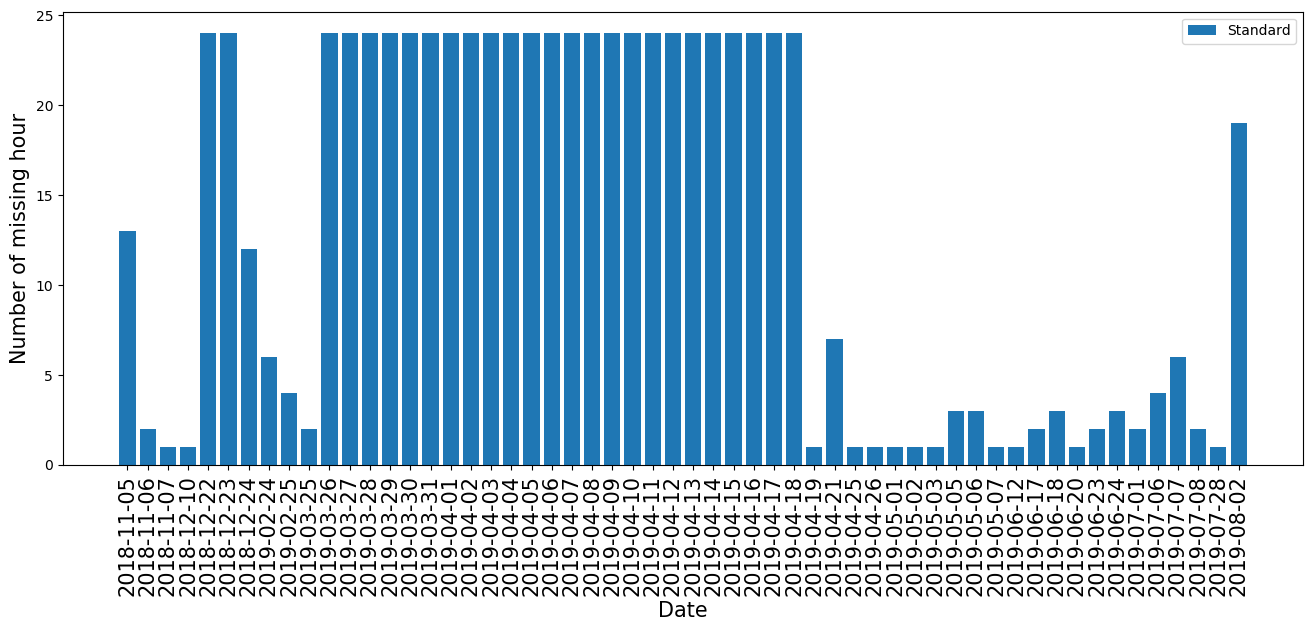

In [67]:
# Plot missing values
plt.figure(figsize=(16, 6), dpi=100)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number of missing hour',fontsize=15)

plt.bar(nandataSpd.index,nandataSpd.loc[:,0],label='Standard')
plt.legend()

plt.savefig('nadataS.jpg',bbox_inches = 'tight')